In the word analogy task, we complete the sentence "a is to b as c is to __". An example is 'man is to woman as king is to queen' . In detail, we are trying to find a word d, such that the associated word vectors ea,eb,ec,ed are related in the following manner: eb−ea≈ed−ec. We will measure the similarity between eb−ea and ed−ec using cosine similarity.

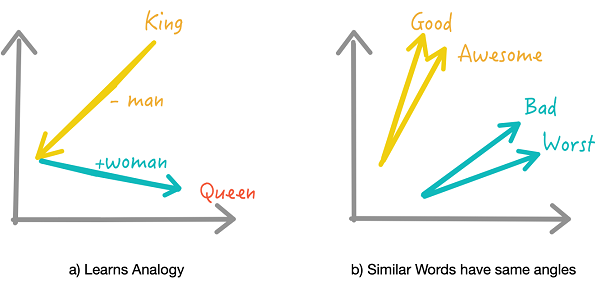

### Prepare data

In [1]:
import re
from nltk.tokenize import sent_tokenize , word_tokenize
from nltk.corpus import stopwords

In [4]:
sw = set(stopwords.words('english'))
len(sw)

179

In [5]:
with open('bollywood.txt' , 'r' , encoding = 'utf-8') as file:
    text = file.read()
    sentences = sent_tokenize(text)
    
    corpus = []
    for sent in sentences:
        sent = re.sub('[^a-zA-Z]', ' ', sent)
        words = word_tokenize(sent)
        words = [word.lower() for word in words if len(word) > 3 and word not in sw]
        corpus.append(words)

In [6]:
len(corpus)

31

In [10]:
sum(len(line) for line in corpus)

310

### Create word2vec model

In [12]:
import gensim
from gensim.models import Word2Vec , KeyedVectors

In [25]:
model = Word2Vec(corpus , vector_size = 300 , window = 10 , min_count = 2)
type(model)

gensim.models.word2vec.Word2Vec

In [28]:
print(model)

Word2Vec(vocab=52, vector_size=300, alpha=0.025)


In [30]:
model.wv.get_vector('party').shape

(300,)

In [35]:
print(model.wv.key_to_index)

{'year': 0, 'priyanka': 1, 'wedding': 2, 'nick': 3, 'deepika': 4, 'ranveer': 5, 'sharma': 6, 'chopra': 7, 'jonas': 8, 'december': 9, 'anushka': 10, 'chatrath': 11, 'kapil': 12, 'weddings': 13, 'padukone': 14, 'singh': 15, 'virat': 16, 'couple': 17, 'reception': 18, 'ginni': 19, 'isha': 20, 'parties': 21, 'anand': 22, 'piramal': 23, 'ambani': 24, 'shared': 25, 'grand': 26, 'from': 27, 'celebrations': 28, 'another': 29, 'looks': 30, 'airport': 31, 'wife': 32, 'style': 33, 'friends': 34, 'married': 35, 'mumbai': 36, 'this': 37, 'lavish': 38, 'extravagant': 39, 'delhi': 40, 'pictures': 41, 'party': 42, 'many': 43, 'nothing': 44, 'beats': 45, 'award': 46, 'social': 47, 'media': 48, 'even': 49, 'knot': 50, 'photos': 51}


### Create Analogies

In [36]:
from sklearn.metrics.pairwise import cosine_similarity

In [40]:
def predict(a , b , c):
    
    a , b , c = a.lower() , b.lower() , c.lower()
    wa , wb , wc = model.wv[a] , model.wv[b] , model.wv[c]
    
    options = ["ranveer","deepika","padukone","singh","nick","jonas","chopra","priyanka","virat","anushka","ginni","sharma","kohli"]
    
    max_similarity = -10
    d = None
    for word in options:
        if word in [a, b, c]:
            continue
            
        wd = model.wv[word]
        sim = cosine_similarity([wb-wa] , [wd-wc])
        
        if sim > max_similarity:
            max_similarity = sim
            d = word
            
        return d

### Predictions

In [46]:
triad = ("ranveer","singh","deepika")
predict(*triad)

'padukone'

In [51]:
triad = ("nick","priyanka","ranveer")
predict(*triad)

'deepika'

In [62]:
triad = ("sharma","kapil","singh")
predict(*triad)

'ranveer'

In [66]:
model.wv.save_word2vec_format('bollywood_analogy.bin')

### Visualizing words in embedded vector space

In [74]:
model = KeyedVectors.load_word2vec_format('bollywood_analogy.bin')

In [75]:
import numpy as np
from sklearn.manifold import TSNE

In [76]:
all_vectors = [model[w] for w in list(model.key_to_index.keys())]
all_vectors = np.array(all_vectors)
print(all_vectors.shape)

(116, 300)


In [80]:
tsne = TSNE(n_components=2 , n_iter=300 , perplexity=30 , verbose=1)
tsne_results = tsne.fit_transform(all_vectors)
print(tsne_results.shape)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 116 samples in 0.000s...
[t-SNE] Computed neighbors for 116 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 116 / 116
[t-SNE] Mean sigma: 0.004361
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.564011
[t-SNE] KL divergence after 300 iterations: 1.519125
(116, 2)


In [81]:
import matplotlib.pyplot as plt

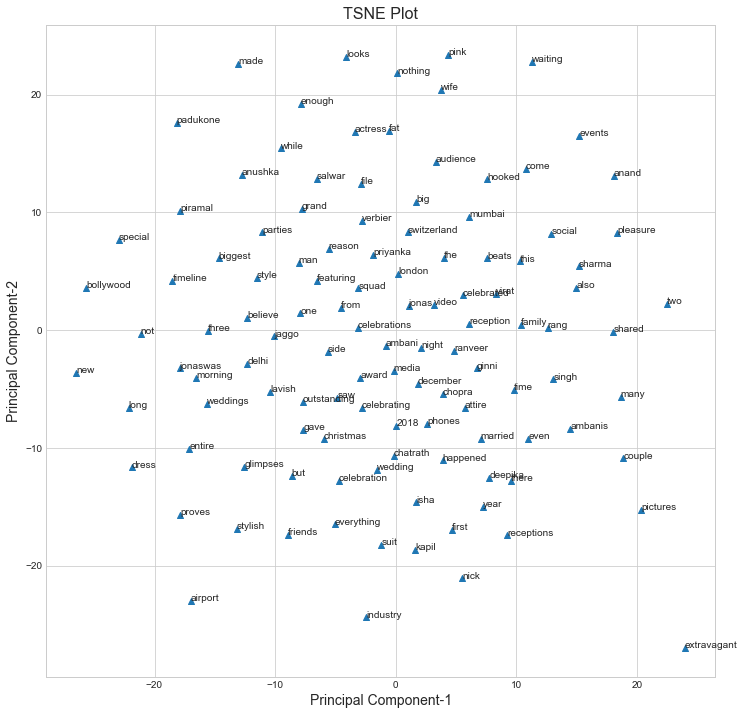

In [82]:
plt.figure(figsize=(12, 12))
plt.style.use('seaborn-whitegrid')

plt.scatter(tsne_results[:,0] , tsne_results[:,1] , marker = '^')

keys = model.key_to_index.keys()
for label , x , y in zip(keys , tsne_results[:,0] , tsne_results[:,1]):
    plt.annotate(label , xy = (x,y))

plt.xlabel("Principal Component-1" , size = 14)
plt.ylabel("Principal Component-2" , size = 14)
plt.title("TSNE Plot" , size = 16)

plt.show()